In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
for column in df:
  print(f'{column} : {df[column].unique()}')

RowNumber : [    1     2     3 ...  9998  9999 10000]
CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 7

In [6]:
df.drop(["Surname","RowNumber","CustomerId"], axis=1, inplace=True)

In [7]:
df.shape

(10000, 11)

In [8]:
df = df.replace({'Gender': {'Male':1, 'Female':0}})

In [9]:
df = pd.get_dummies(data = df, columns=['Geography'])

In [10]:
for column in df:
  print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [11]:
df = df.astype(int)

In [12]:
for column in df:
  print(f'{column} : {df[column].dtype}')

CreditScore : int32
Gender : int32
Age : int32
Tenure : int32
Balance : int32
NumOfProducts : int32
HasCrCard : int32
IsActiveMember : int32
EstimatedSalary : int32
Exited : int32
Geography_France : int32
Geography_Germany : int32
Geography_Spain : int32


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [15]:
scaler = MinMaxScaler()

In [16]:
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,0,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,0,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,0,1


In [18]:
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [19]:
churn_tenure_yes = df[df.Exited==1].Tenure
churn_tenure_no = df[df.Exited==0].Tenure

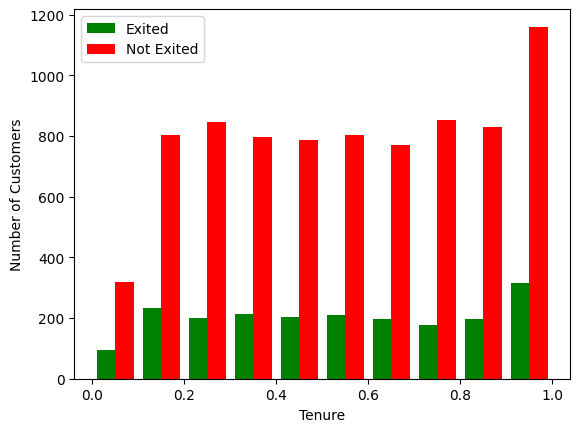

In [20]:
plt.hist([churn_tenure_yes,churn_tenure_no], color=['green','red'], label=['Exited','Not Exited'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [21]:
geography_France_churn_yes = df[(df.Exited==1) & (df.Geography_France==1)].Geography_France
geography_France_churn_no = df[(df.Exited==0) & (df.Geography_France==1)].Geography_France

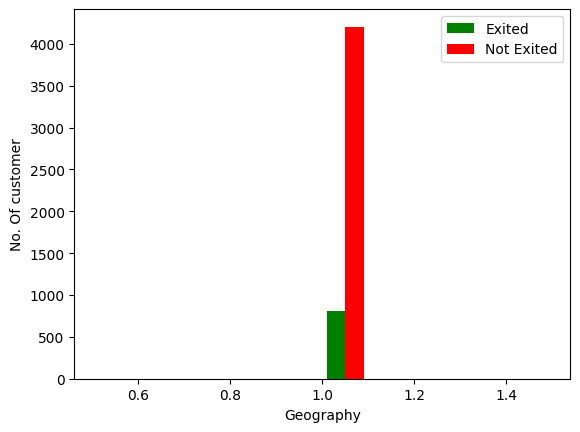

In [22]:
plt.hist([geography_France_churn_yes, geography_France_churn_no], color=['green','red'], label=['Exited', 'Not Exited'])
plt.xlabel('Geography')
plt.ylabel('No. Of customer')
plt.legend()
plt.show()

In [23]:
balance_exited = df[df.Exited==1].Balance
balance_not_exited = df[df.Exited==0].Balance

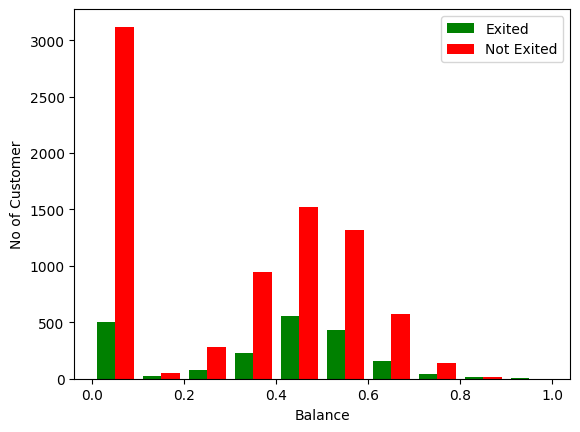

In [24]:
plt.hist([balance_exited, balance_not_exited], color=['green','red'], label=['Exited', 'Not Exited'])
plt.xlabel('Balance')
plt.ylabel('No of Customer')
plt.legend()
plt.show()

In [25]:
df.shape

(10000, 13)

In [26]:
X = df.drop('Exited', axis=1)
Y = df['Exited']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2)

In [29]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import models

In [30]:
model = models.Sequential([
    tfl.Flatten(input_shape=(12,)),
    tfl.Dense(200, activation='relu'),
    tfl.Dense(100, activation='relu'),
    tfl.Dense(50, activation='relu'),
    tfl.Dense(1,activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
train_X.shape

(8000, 12)

In [33]:
model.fit(train_X, train_Y, epochs=30)

Epoch 1/30


250/250 [==============================] - 3s 3ms/step - loss: 0.4591 - accuracy: 0.8051
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8329
Epoch 3/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3606 - accuracy: 0.8501
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8537
Epoch 5/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8590
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8589
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8669
Epoch 8/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8644
Epoch 9/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8633
Epoch 10/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.86

In [34]:
model.evaluate(test_X, test_Y)

63/63 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8455


[0.3863982856273651, 0.8454999923706055]

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
test_Y_pred = model.predict(test_X)

63/63 [==============================] - 0s 2ms/step


In [37]:
pred_test_Y = []
for element in test_Y_pred:
  if element >0.5:
    pred_test_Y.append(1)
  else:
    pred_test_Y.append(0)
conf_mat = confusion_matrix(test_Y, pred_test_Y)

In [38]:
conf_mat

array([[1490,   88],
       [ 221,  201]], dtype=int64)

<Axes: >

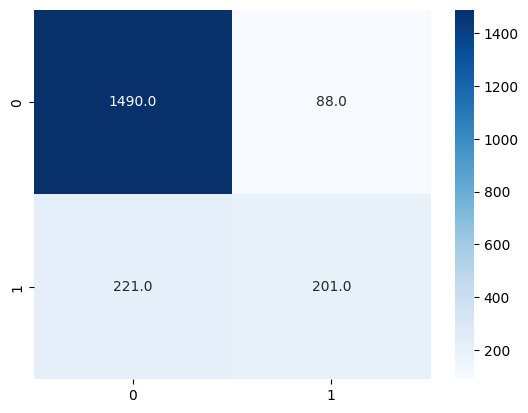

In [39]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='.1f', cmap='Blues')